<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-LAB/blob/master/BJBS_AI_Lab_Session_02_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="300" src="https://raw.githubusercontent.com/bghaendler/BJBS-AI-LAB/master/img/BJBSAILogo.png" align="right"> 
# Session 2 Lab: House Price Prediction


In [0]:
import pandas as pd

In [0]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

Data Source: Resale Flat Prices
https://data.gov.sg/dataset/resale-flat-prices

Notes:

- The approximate floor area includes any recess area purchased, space adding item under HDB’s upgrading programmes, roof terrace, etc.

- The transactions exclude resale transactions that may not reflect the full market price such as resale between relatives and resale of part shares.

- Resale prices should be taken as indicative only as the resale prices agreed between buyers and sellers are dependent on many factors.

- "Remaining lease" is the number of years, months and days left before the lease expires. This information is computed as at the resale flat application and has been rounded up to the nearest month for the purpose of CPF monies usage and HDB loan application.

In [0]:
GoogleDriveFolder = "/content/drive/My Drive/Colab Notebooks/BJBS AI Lab/02 Session - Wuhan Coronavirus - House Price Prediction/"

In [0]:
Files = (
    "resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv",
    "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
    "resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv",
    "resale-flat-prices-based-on-approval-date-2000-feb-2012.csv",
    "resale-flat-prices-based-on-approval-date-1990-1999.csv")

In [5]:
appended_data = []
for i in Files:
    print(i)
    df = pd.read_csv(GoogleDriveFolder + i)
    try:
      df = pd.read_csv(GoogleDriveFolder + i)
      print(df.shape)
      appended_data.append(df)
    except:
      pass
df = pd.concat(appended_data)
df.sample(10)

resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv
(52203, 10)
resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
(60361, 11)
resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv
(37153, 11)
resale-flat-prices-based-on-approval-date-2000-feb-2012.csv
(369651, 10)
resale-flat-prices-based-on-approval-date-1990-1999.csv
(287200, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
57891,620,Model A2,4 ROOM,92.0,1998,2019-09,77 years 11 months,300000.0,04 TO 06,WOODLANDS DR 52,WOODLANDS
256224,383,Model A,4 ROOM,92.0,2005,2008-03,NaN,362000.0,10 TO 12,BT BATOK WEST AVE 5,BUKIT BATOK
176146,247,New Generation,3 ROOM,67.0,1984,2005-04,NaN,145000.0,04 TO 06,HOUGANG AVE 3,HOUGANG
5296,210,IMPROVED,5 ROOM,125.0,1985,1990-05,NaN,135000.0,04 TO 06,TAMPINES ST 23,TAMPINES
102128,206,NEW GENERATION,3 ROOM,67.0,1985,1995-09,NaN,120000.0,04 TO 06,YISHUN ST 21,YISHUN
133155,109,Improved,2 ROOM,45.0,1986,2003-11,NaN,107000.0,07 TO 09,ALJUNIED CRES,GEYLANG
79517,539,MODEL A,5 ROOM,134.0,1984,1994-10,NaN,277000.0,01 TO 03,JURONG WEST AVE 1,JURONG WEST
255834,341,IMPROVED,5 ROOM,124.0,1995,1999-05,NaN,310000.0,04 TO 06,TAMPINES ST 33,TAMPINES
30398,316,Simplified,4 ROOM,89.0,1985,2013-08,NaN,398000.0,01 TO 03,UBI AVE 1,GEYLANG
163243,187,Improved,3 ROOM,59.0,1978,2004-11,NaN,170000.0,16 TO 18,BOON LAY AVE,JURONG WEST


In [0]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['month'].dt.year
df['flat_model'] = df['flat_model'].str.title()
df['street_name'] = df['street_name'].str.title()
df['town'] = df['town'].str.title()
df['flat_type'] = df['flat_type'].str.title()

In [7]:
df.sample(10)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,year
183045,431,Model A,4 Room,104.0,1985,1998-02-01,NaN,251000.0,07 TO 09,Jurong West Ave 1,Jurong West,1998
141574,262,New Generation,3 Room,73.0,1985,1996-11-01,NaN,185000.0,01 TO 03,Bt Batok East Ave 4,Bukit Batok,1996
94999,352,Maisonette,Executive,146.0,1988,1995-06-01,NaN,418000.0,07 TO 09,Yishun Ring Rd,Yishun,1995
23802,227,Improved,5 Room,120.0,1984,2000-09-01,NaN,343000.0,19 TO 21,Jurong East St 21,Jurong East,2000
93770,108,Maisonette,Executive,146.0,1989,1995-06-01,NaN,345000.0,01 TO 03,Teck Whye Lane,Choa Chu Kang,1995
13912,113,New Generation,3 Room,67.0,1985,1991-02-01,NaN,42000.0,01 TO 03,Bedok Reservoir Rd,Bedok,1991
212640,803,New Generation,4 Room,100.0,1984,1998-09-01,NaN,260000.0,04 TO 06,Tampines Ave 4,Tampines,1998
97418,139,New Generation,3 Room,68.0,1984,2002-08-01,NaN,130000.0,07 TO 09,Yishun Ring Rd,Yishun,2002
142509,137,Apartment,Executive,140.0,1998,2004-02-01,NaN,360000.0,04 TO 06,Rivervale St,Sengkang,2004
168806,154,Improved,3 Room,67.0,1970,2005-01-01,NaN,172000.0,10 TO 12,Mei Ling St,Queenstown,2005


In [8]:
df.shape

(806568, 12)

In [9]:
df.head().T

,0,1,2,3,4
block,172,510,610,474,604
flat_model,Improved,Improved,New Generation,New Generation,New Generation
flat_type,2 Room,2 Room,3 Room,3 Room,3 Room
floor_area_sqm,45,44,68,67,67
lease_commence_date,1986,1980,1980,1984,1980
month,2012-03-01 00:00:00,2012-03-01 00:00:00,2012-03-01 00:00:00,2012-03-01 00:00:00,2012-03-01 00:00:00
remaining_lease,NaN,NaN,NaN,NaN,NaN
resale_price,250000,265000,315000,320000,321000
storey_range,06 TO 10,01 TO 05,06 TO 10,01 TO 05,06 TO 10
street_name,Ang Mo Kio Ave 4,Ang Mo Kio Ave 8,Ang Mo Kio Ave 4,Ang Mo Kio Ave 10,Ang Mo Kio Ave 5


In [0]:
import seaborn as sns

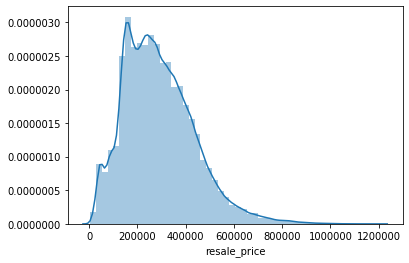

In [11]:
sns.distplot(df['resale_price']);

In [0]:
import matplotlib.pyplot as plt

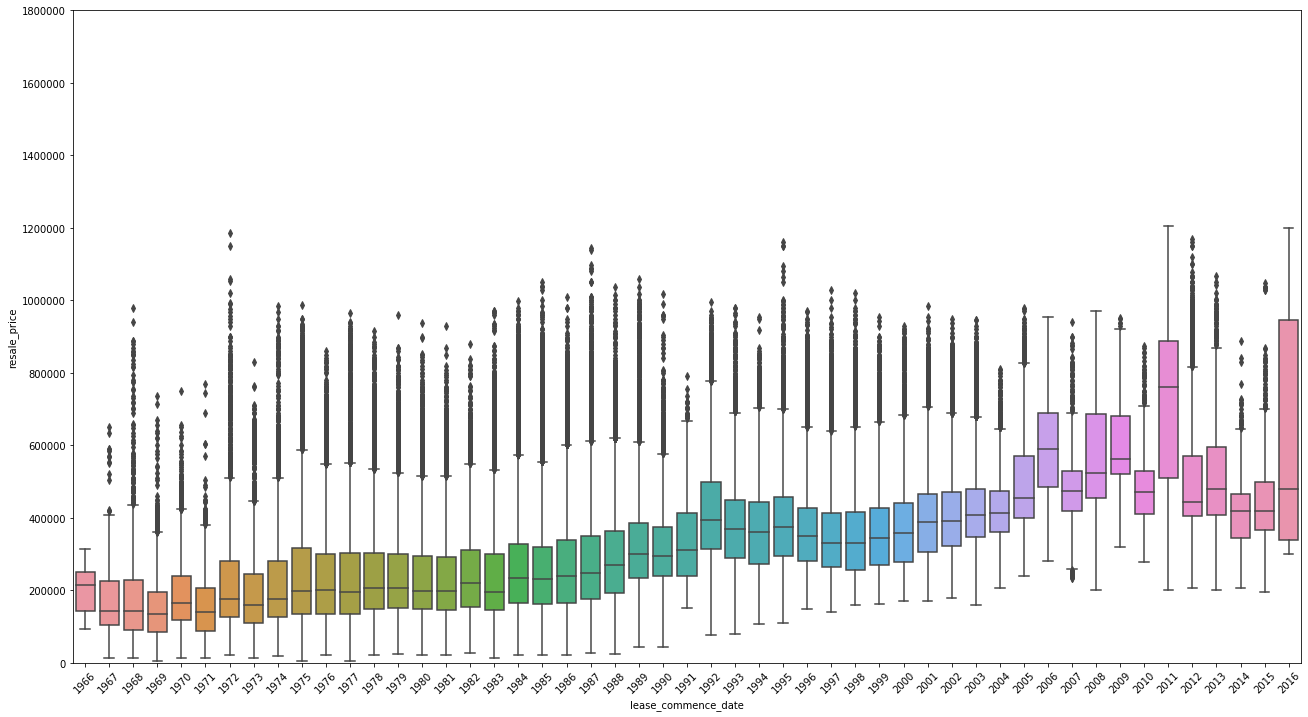

In [13]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x='lease_commence_date', y="resale_price", data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=1800000);


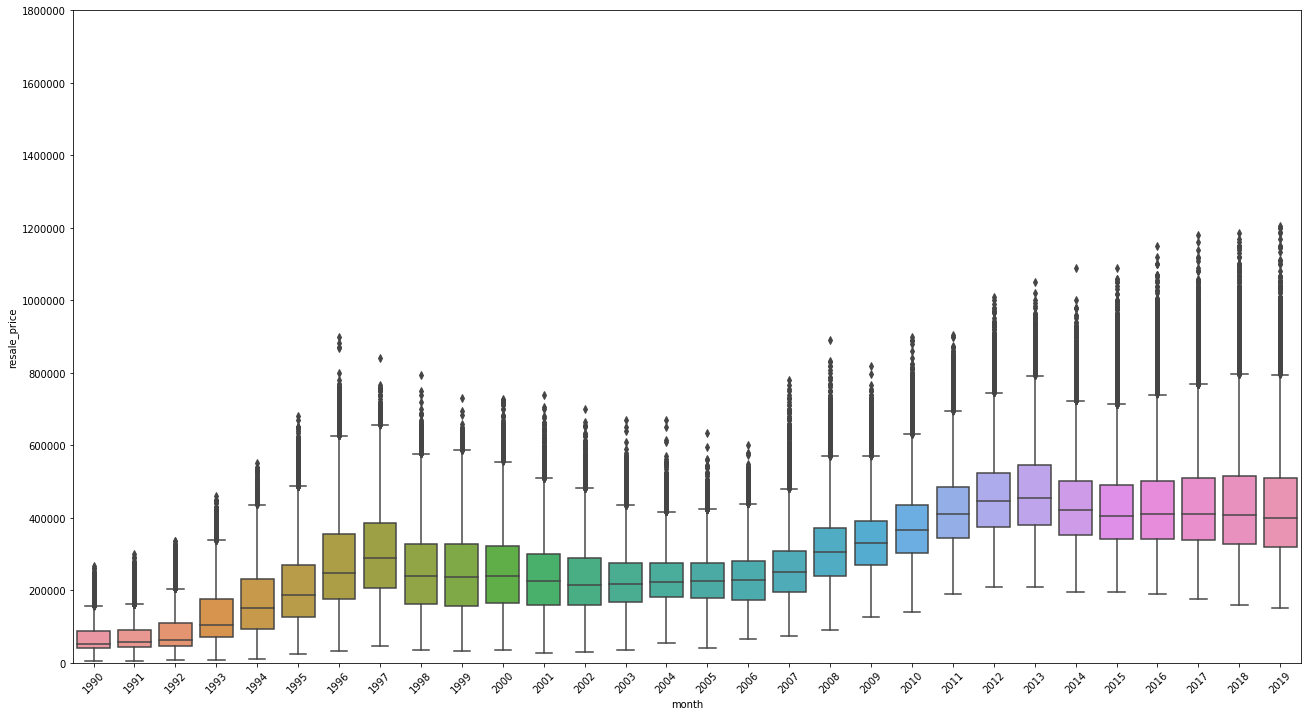

In [14]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x=df.month.dt.year, y="resale_price", data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=1800000);

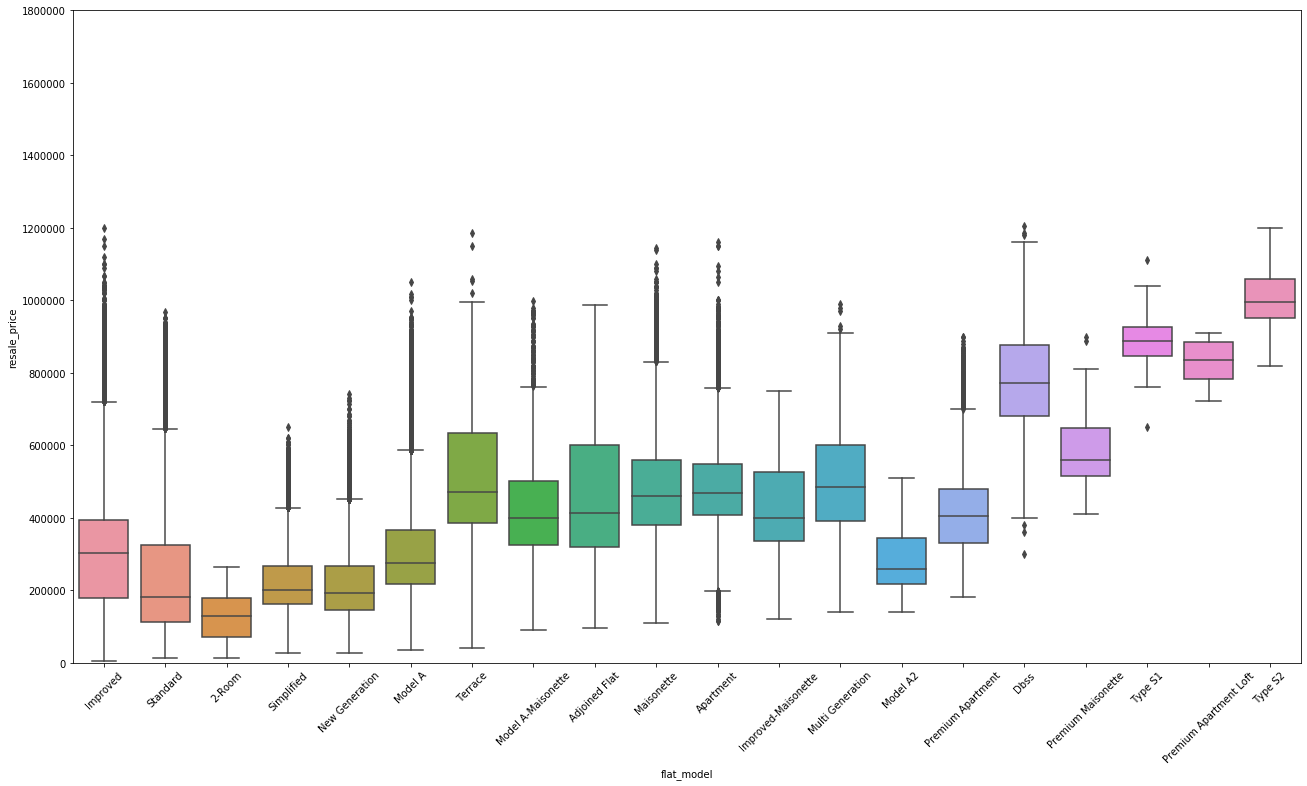

In [15]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x='flat_model', y="resale_price", data=df.sort_values(by="resale_price"))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=1800000);

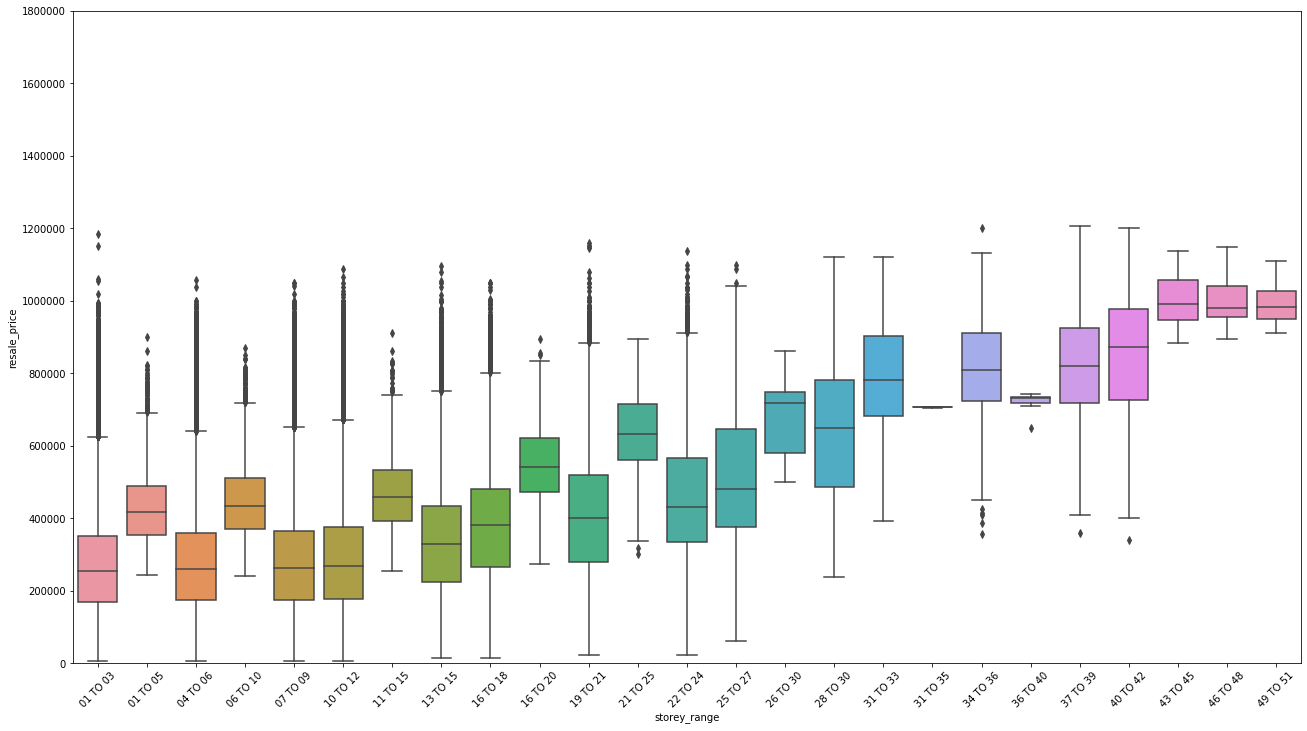

In [16]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x='storey_range', y="resale_price", data=df.sort_values(by="storey_range"))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=1800000);

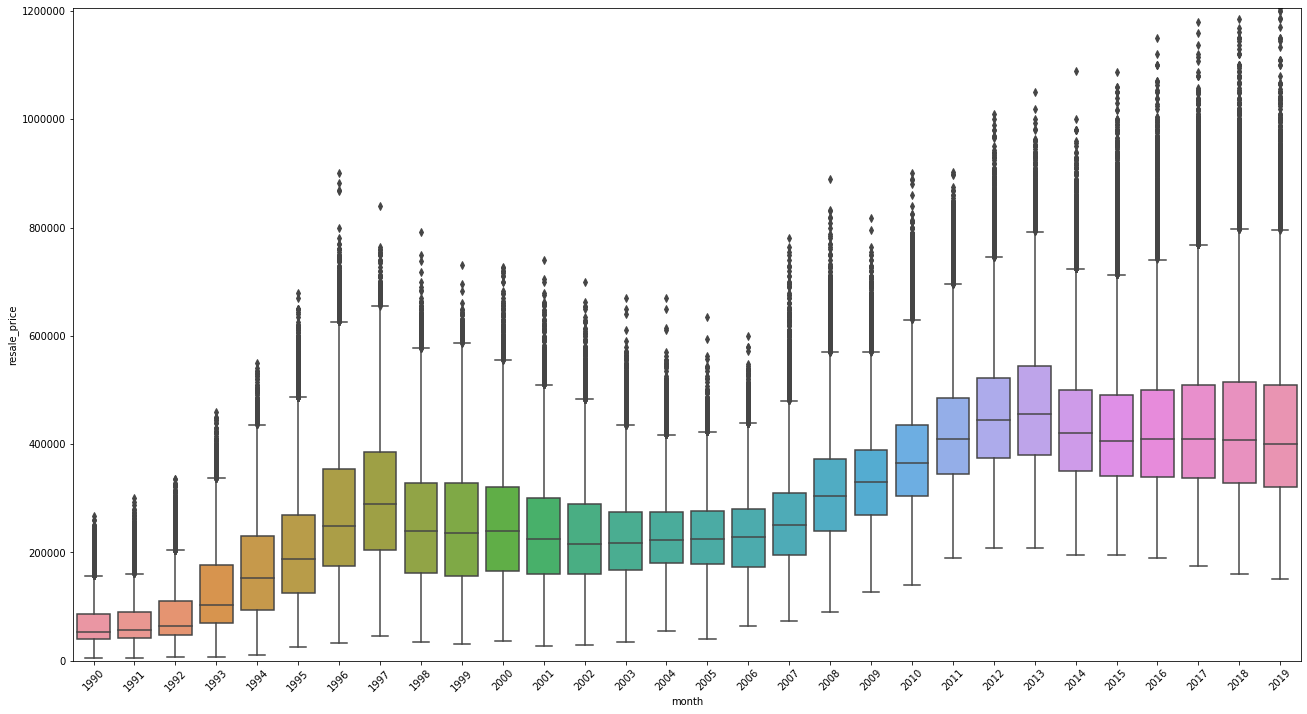

In [17]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x=df.month.dt.year, y="resale_price", data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=df.resale_price.max());

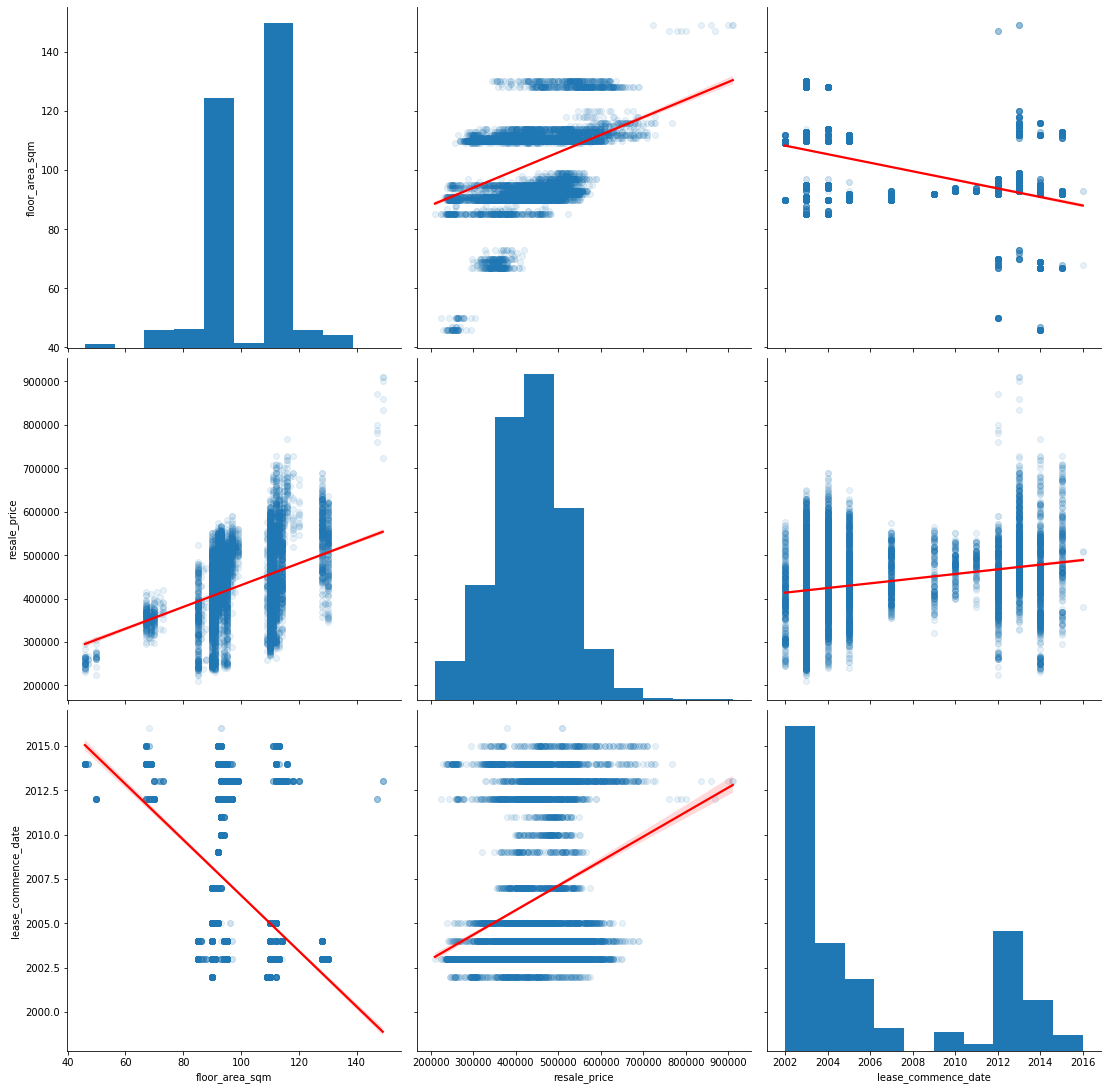

In [18]:
sns.pairplot(df.loc[df["town"] == "Punggol"][["street_name","floor_area_sqm","resale_price","lease_commence_date"]], 
             kind='reg',
             height=5, 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}} )

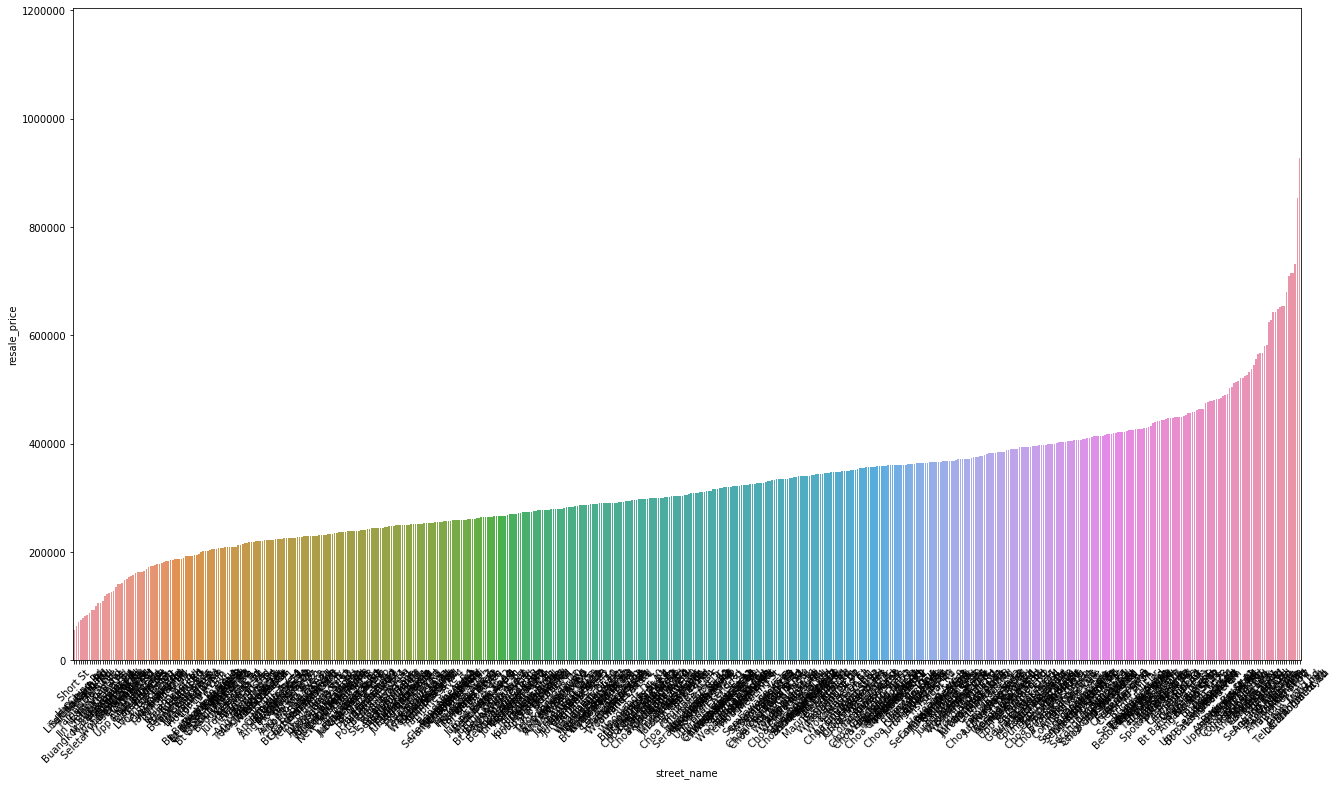

In [19]:
df[["street_name","resale_price"]].groupby(by="street_name").mean().sort_values(by="resale_price", ascending=False)

#sns.barplot(x=df["street_name"], y=df["resale_price"], palette="vlag");

f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="street_name", 
    y="resale_price", 
    data=df[["street_name","resale_price"]].groupby(by="street_name").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=df.resale_price.max());

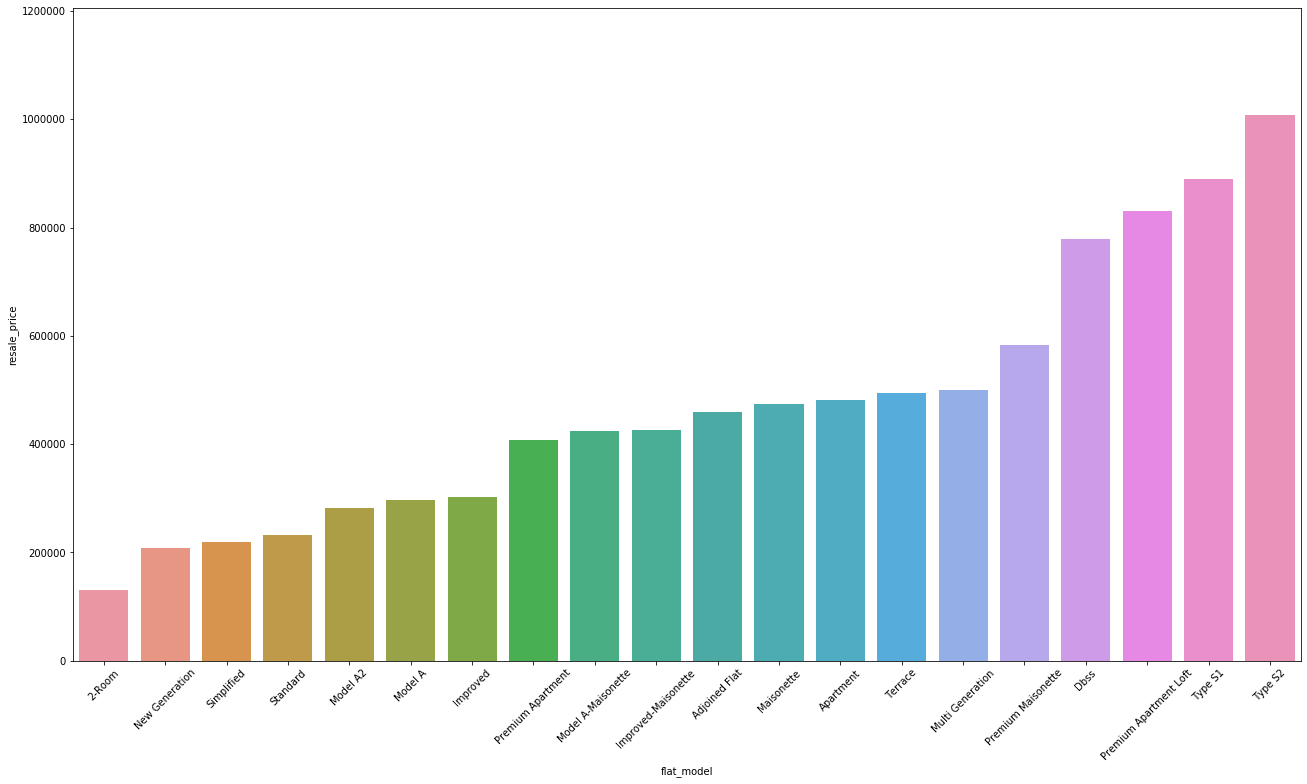

In [20]:
#df[["flat_model","resale_price"]].groupby(by="flat_model").mean().plot()


f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="flat_model", 
    y="resale_price", 
    data=df[["flat_model","resale_price"]].groupby(by="flat_model").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=df.resale_price.max());

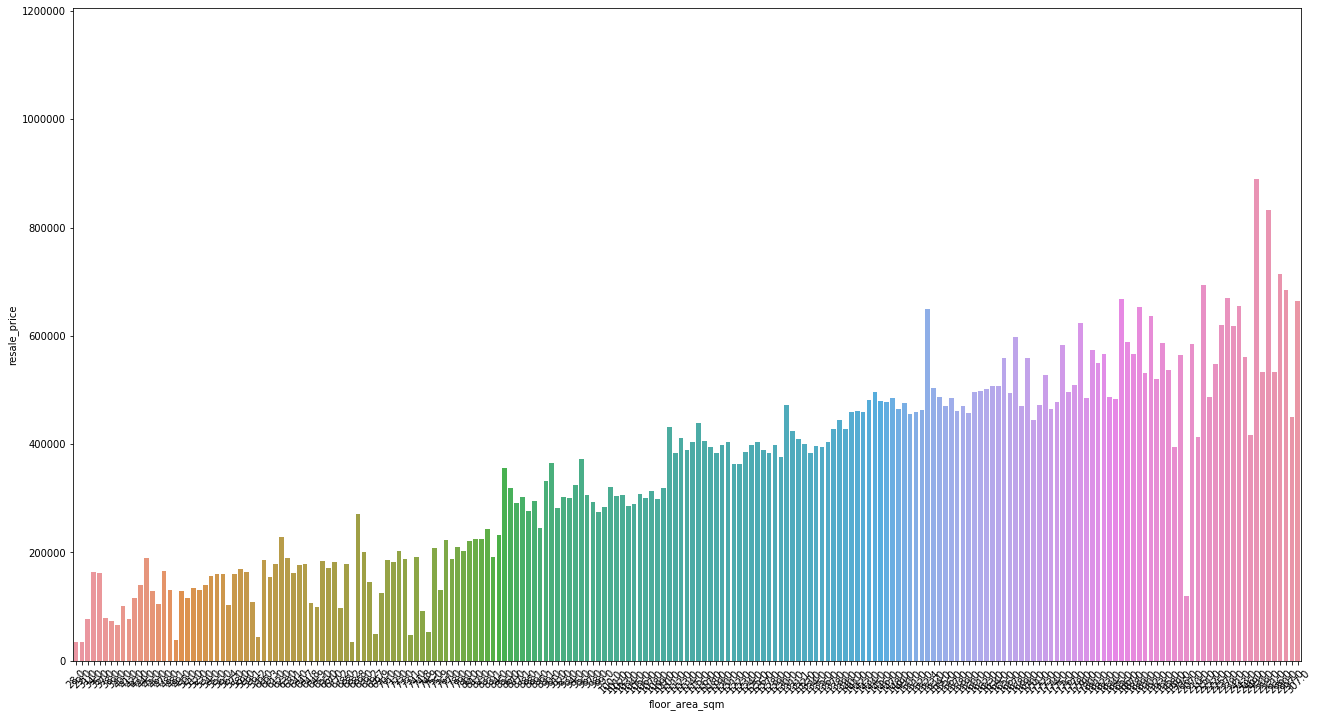

In [21]:
#df[["floor_area_sqm","resale_price"]].groupby(by="floor_area_sqm").mean().plot()


f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="floor_area_sqm", 
    y="resale_price", 
    data=df[["floor_area_sqm","resale_price"]].groupby(by="floor_area_sqm").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=df.resale_price.max());

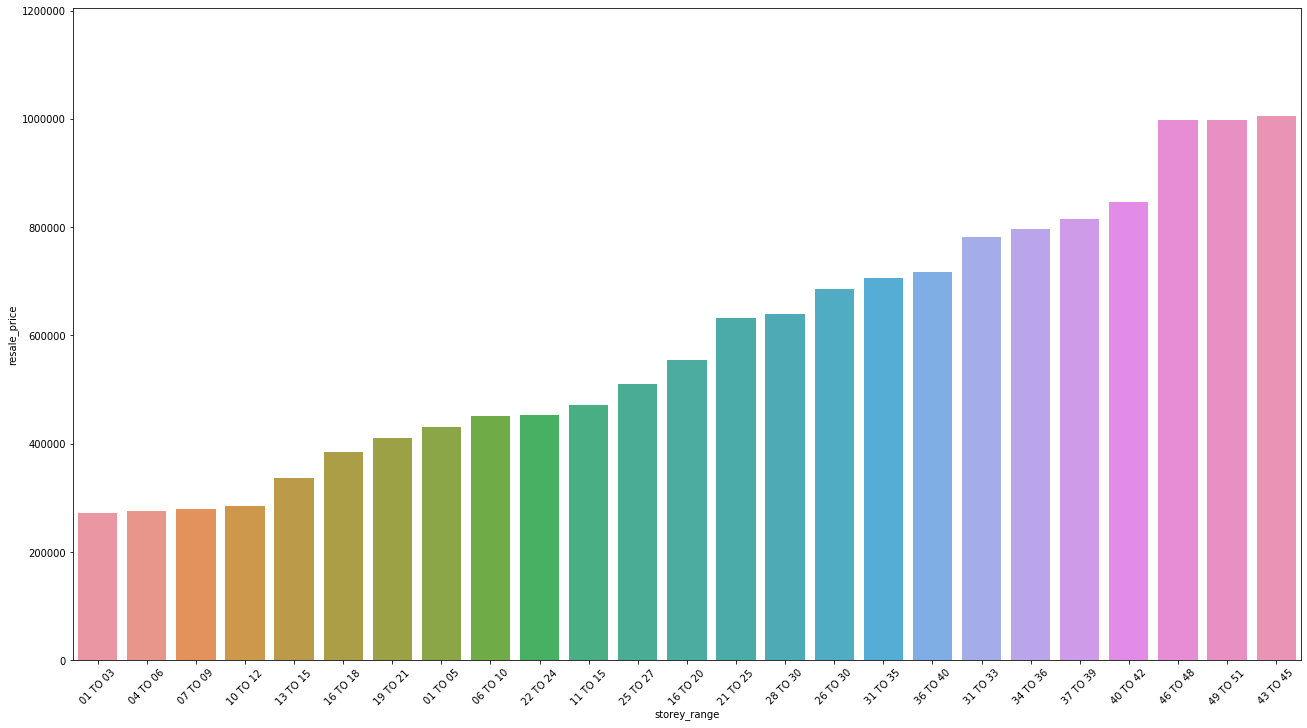

In [22]:
#df[["storey_range","resale_price"]].groupby(by="storey_range").mean().plot()



f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="storey_range", 
    y="resale_price", 
    data=df[["storey_range","resale_price"]].groupby(by="storey_range").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0, ymax=df.resale_price.max());

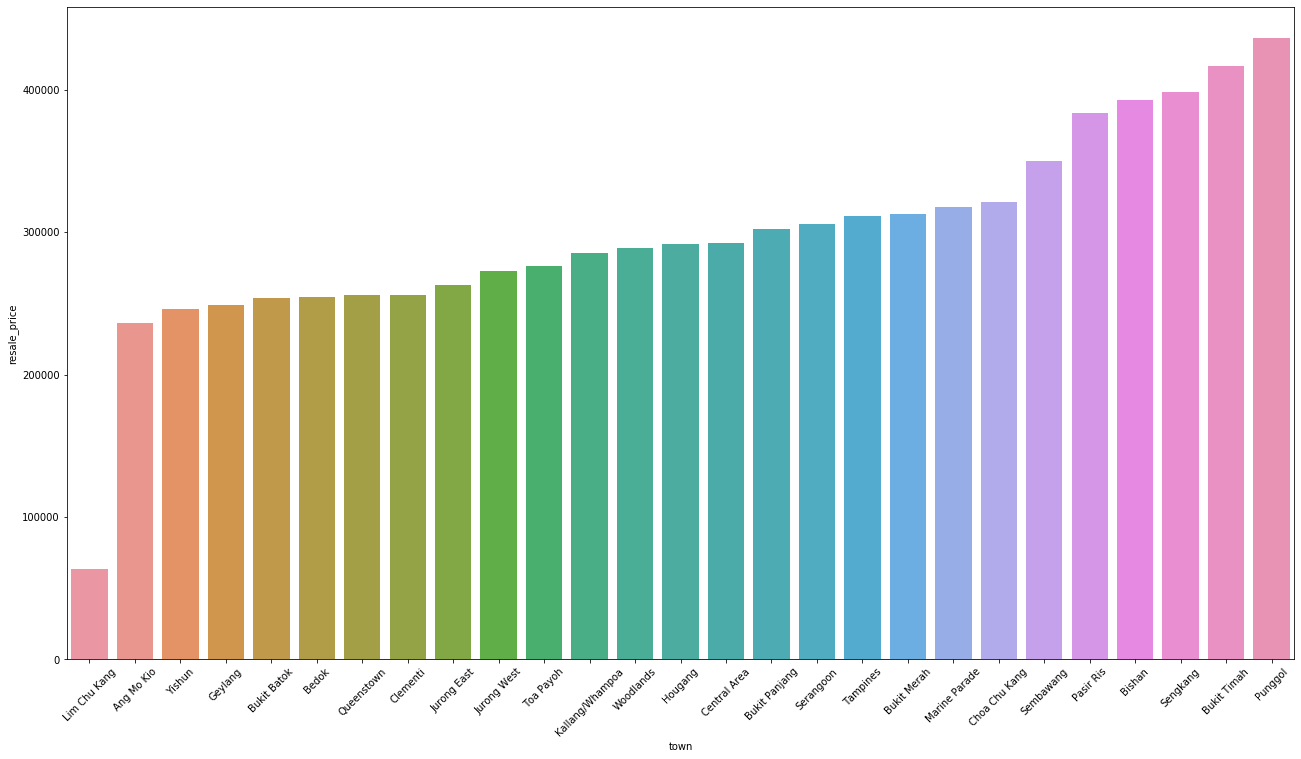

In [23]:
#df[["town","resale_price"]].groupby(by="town").mean()
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="town", 
    y="resale_price", 
    data=df[["town","resale_price"]].groupby(by="town").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0);

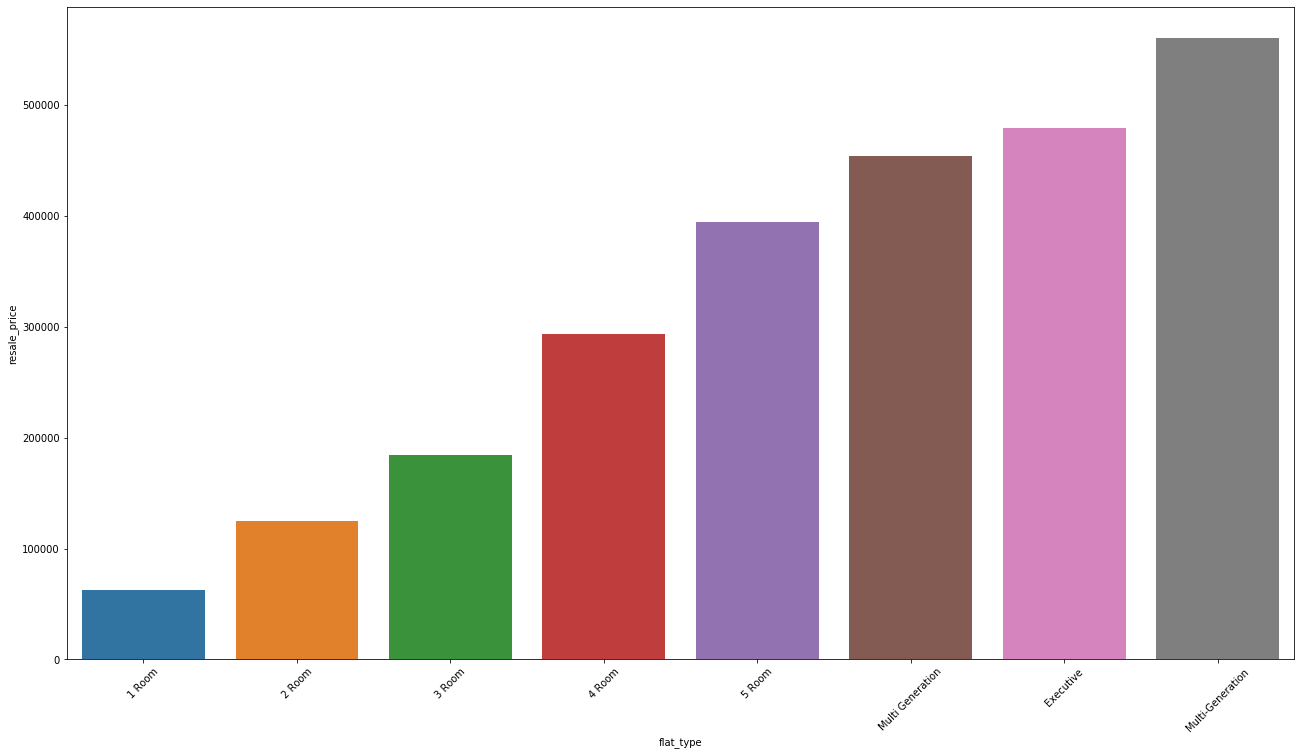

In [24]:
#df[["flat_type","resale_price"]].groupby(by="flat_type").mean()
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="flat_type", 
    y="resale_price", 
    data=df[["flat_type","resale_price"]].groupby(by="flat_type").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0);

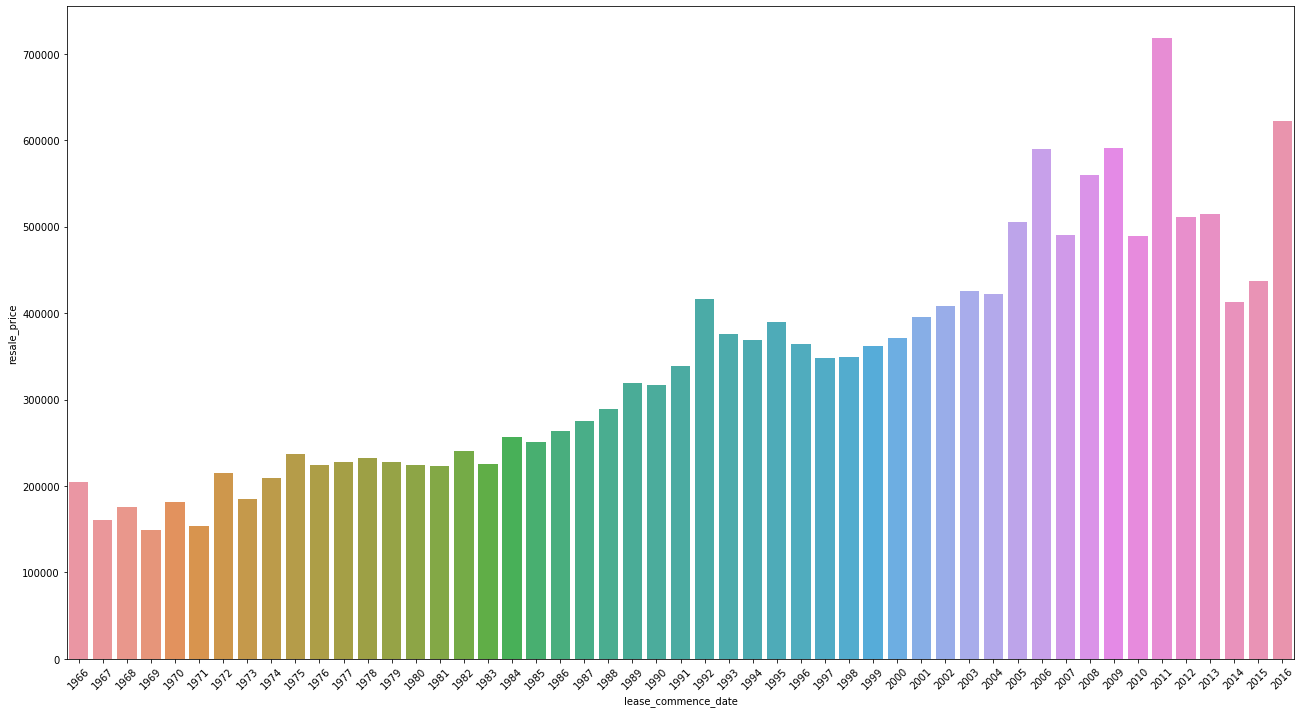

In [25]:
#df[["lease_commence_date","resale_price"]].groupby(by="lease_commence_date").mean()
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="lease_commence_date", 
    y="resale_price", 
    data=df[["lease_commence_date","resale_price"]].groupby(by="lease_commence_date").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0);

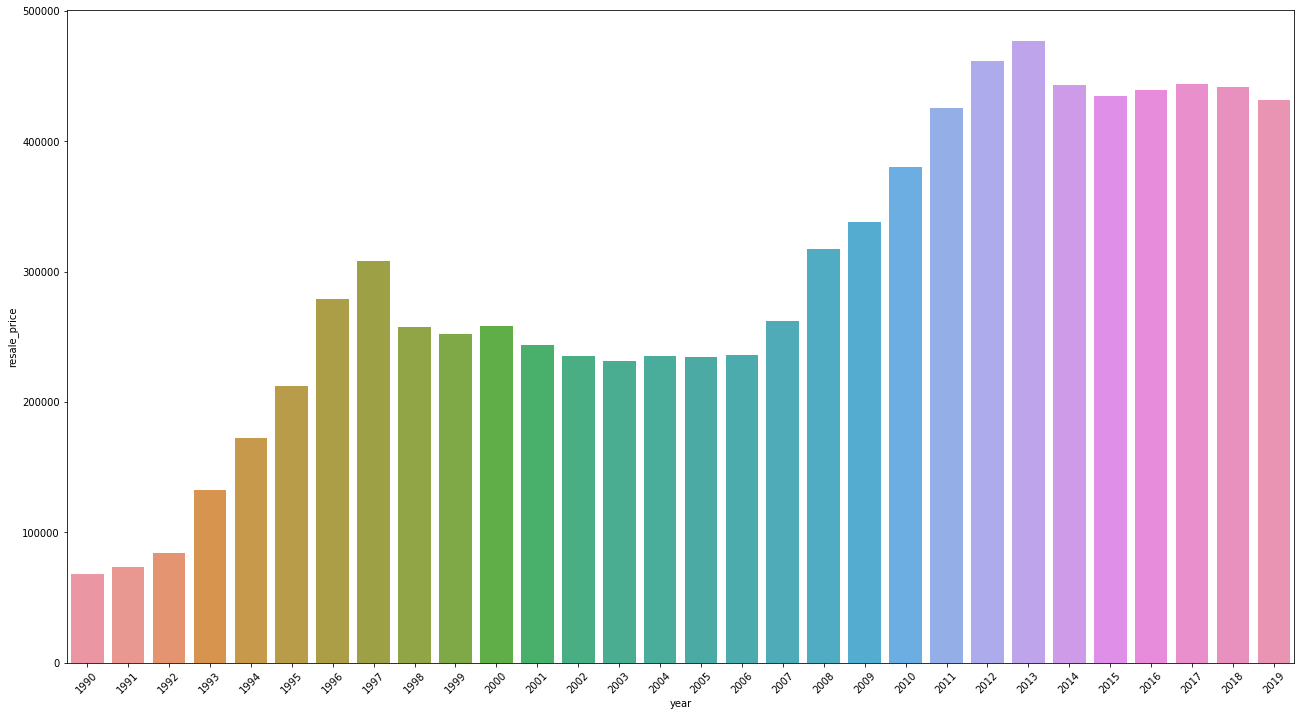

In [26]:
#df[["month","resale_price"]].groupby(by="month").min().plot()#.sort_values(by="resale_price")

f, ax = plt.subplots(figsize=(22, 12))
fig = sns.barplot(
    x="year", 
    y="resale_price", 
    data=df[["year","resale_price"]].groupby(by="year").mean().reset_index().sort_values(by="resale_price", ascending=True))
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
fig.axis(ymin=0);

In [0]:
# needed to display the graphs
%matplotlib inline

In [0]:
from pylab import *

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'scatter')

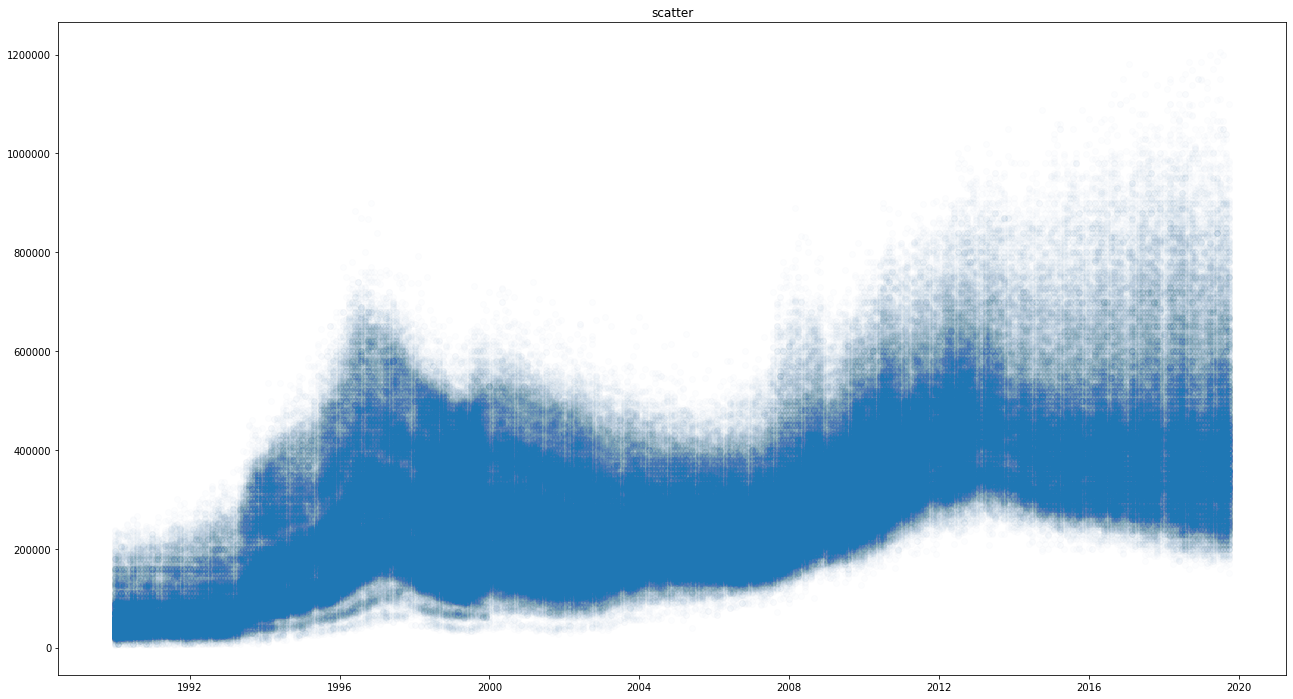

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(22,12))

axes.scatter(df.month,df.resale_price,alpha=0.01, norm=True)
axes.set_title("scatter")

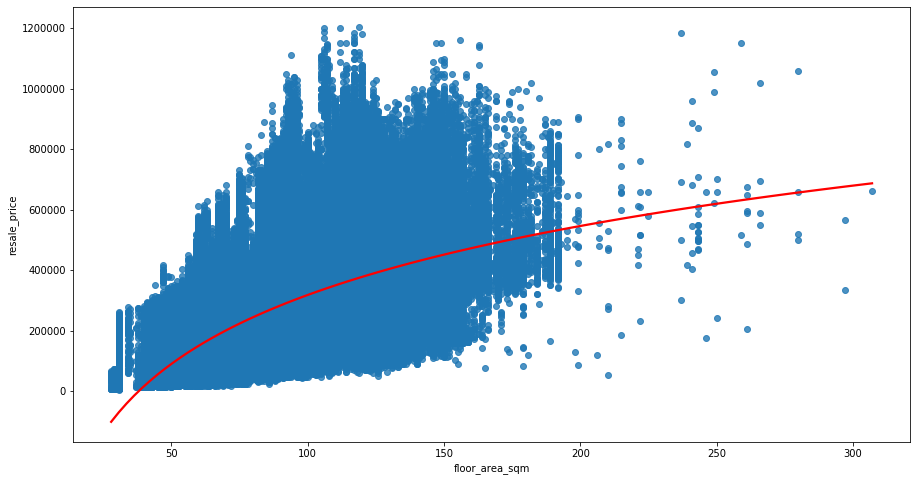

In [30]:
plt.figure(figsize=(15,8))
ax = sns.regplot(df.floor_area_sqm,df.resale_price, logx=True, line_kws={"color": "red"})

In [31]:
df.corr()

,floor_area_sqm,lease_commence_date,resale_price,year
floor_area_sqm,1.000000,0.484775,0.631418,0.073480
lease_commence_date,0.484775,1.000000,0.495120,0.358089
resale_price,0.631418,0.495120,1.000000,0.600351
year,0.073480,0.358089,0.600351,1.000000


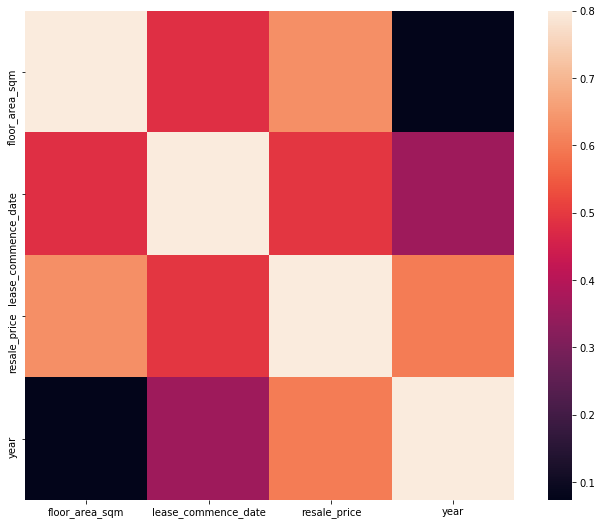

In [32]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);